In [1]:
%load_ext autoreload
# %reload_ext autoreload
%autoreload 1

%aimport b6_epilepsies 
import b6_epilepsies as b6 #.py file in the same dir as this .ipynb
import seaborn as sns
import pandas as pd
# from scipy.stats import mannwhitneyu

# Define the custom color palette and genotype order
new_colors_order = sns.color_palette(palette='Set2', n_colors=3)
new_colors_order[0], new_colors_order[1], new_colors_order[2] = new_colors_order[1], new_colors_order[0], new_colors_order[2]
color_map = dict(zip(['wt', 'het', 'hom'], new_colors_order))



/Users/jadelau/Development/Neuroscience/B6 Epilepsies/b6_epilepsies.py:366: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  cond_df_list.append(cond_df)
/Users/jadelau/Development/Neuroscience/B6 Epilepsies/b6_epilepsies.py:366: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cond_df_list.append(cond_df)


We have a condition!
No filtering applied: 'omit' is None.
Finished prepping data.
Drawing quick plots...
No wells to omit for box 16.


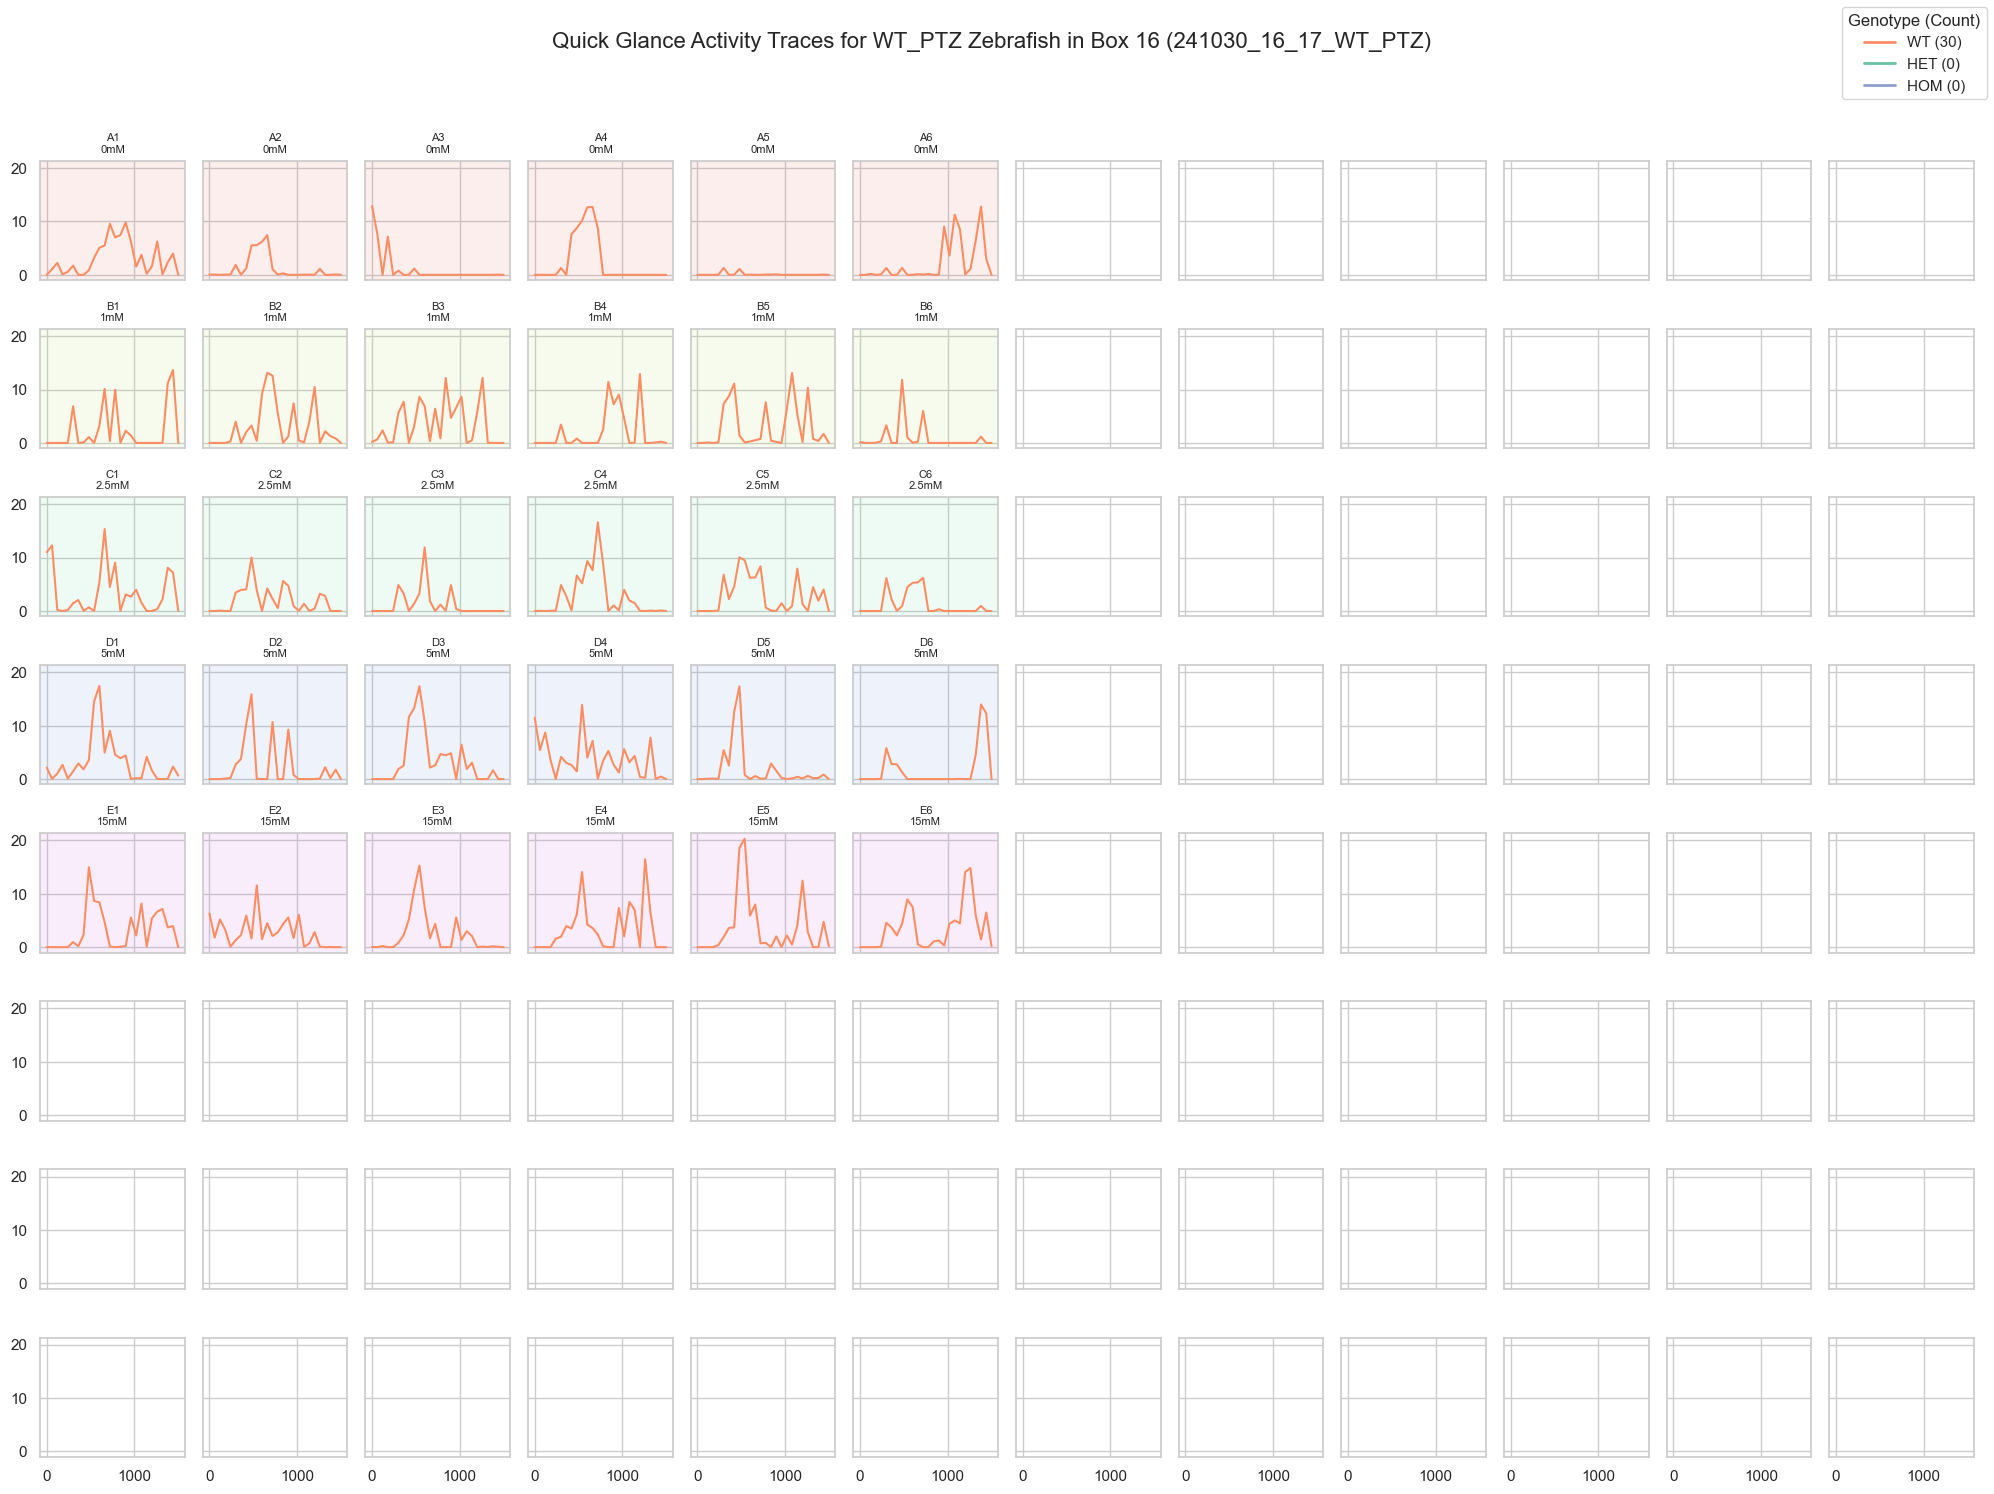

Quick plots, done.


,stdate_sttime,location,animal,start,end,middur,box,plate,well,genotype,condition
0,2024-10-30 14:38:00,C001,1-A01,0,60.000,0.000,16,1,A1,wt,0mM
1,2024-10-30 14:38:00,C002,1-A02,0,60.000,0.040,16,1,A2,wt,0mM
2,2024-10-30 14:38:00,C003,1-A03,0,60.000,12.878,16,1,A3,wt,0mM
3,2024-10-30 14:38:00,C004,1-A04,0,60.000,0.000,16,1,A4,wt,0mM
4,2024-10-30 14:38:00,C005,1-A05,0,60.000,0.000,16,1,A5,wt,0mM
...,...,...,...,...,...,...,...,...,...,...,...
775,2024-10-30 15:03:00,C050,1-E02,1500,1500.686,0.000,16,1,E2,wt,15mM
776,2024-10-30 15:03:00,C051,1-E03,1500,1500.686,0.000,16,1,E3,wt,15mM
777,2024-10-30 15:03:00,C052,1-E04,1500,1500.686,0.000,16,1,E4,wt,15mM
778,2024-10-30 15:03:00,C053,1-E05,1500,1500.686,0.198,16,1,E5,wt,15mM


In [8]:
#Middur output NOT FOR Sleep Analysis
# Define input variables
date   = "241030"
box1   = "16"
box2   = "17"
exp    = "WT_PTZ"
export = False
    
wt_ptz_obj = b6.MiddurData(date, box1, box2, exp, export) #.prepped_data attribute to access df
wt_ptz_obj.quick_plot_per_fish()
df = wt_ptz_obj.prepped_data
df

In [2]:
import pandas as pd
from scipy.stats import shapiro, kruskal, f_oneway

df = wt_ptz_obj.prepped_data
# wtptz_by_geno_cond = df.groupby(['genotype','condition','well'])['middur'].apply(list)

# Load your data into a DataFrame
# Assuming your data is already in the variable `df`

# Group data by genotype and condition, and collect data for each condition
# grouped_data = df.groupby(['genotype', 'condition','well'])['middur'].agg('mean','count','sum')
# print(grouped_data)
# print(wtptz_by_geno_cond)

# Group data by genotype and condition, and collect data for each condition
grouped_data = df.groupby(['genotype', 'condition'])['middur'].sum().apply(list)


# Test for normality using the Shapiro-Wilk test
# normality_results = {}
# for group, data in grouped_data.items():
#     stat, p_value = shapiro(data)
#     normality_results[group] = {'statistic': stat, 'p-value': p_value, 'normal': p_value > 0.05}

# # # Convert normality results to a DataFrame
# normality_df = pd.DataFrame.from_dict(normality_results, orient='index')

# # # Display the normality test results
# print("Normality Test Results:")
# print(normality_df)

# # # Decide on the statistical test
# if normality_df['normal'].all():
#     # Perform a one-way ANOVA if all groups are normally distributed
#     anova_stat, anova_p = f_oneway(*grouped_data)
#     print("\nOne-Way ANOVA Results:")
#     print(f"Statistic: {anova_stat}, p-value: {anova_p}")
# else:
#     # Perform a Kruskal-Wallis H test if normality is violated
#     kruskal_stat, kruskal_p = kruskal(*grouped_data)
#     print("\nKruskal-Wallis H Test Results:")
#     print(f"Statistic: {kruskal_stat}, p-value: {kruskal_p}")

NameError: name 'wt_ptz_obj' is not defined

Text(0.5, 1.05, 'Distribution of Average Activity Across PTZ Concentrations (Log Scale)')

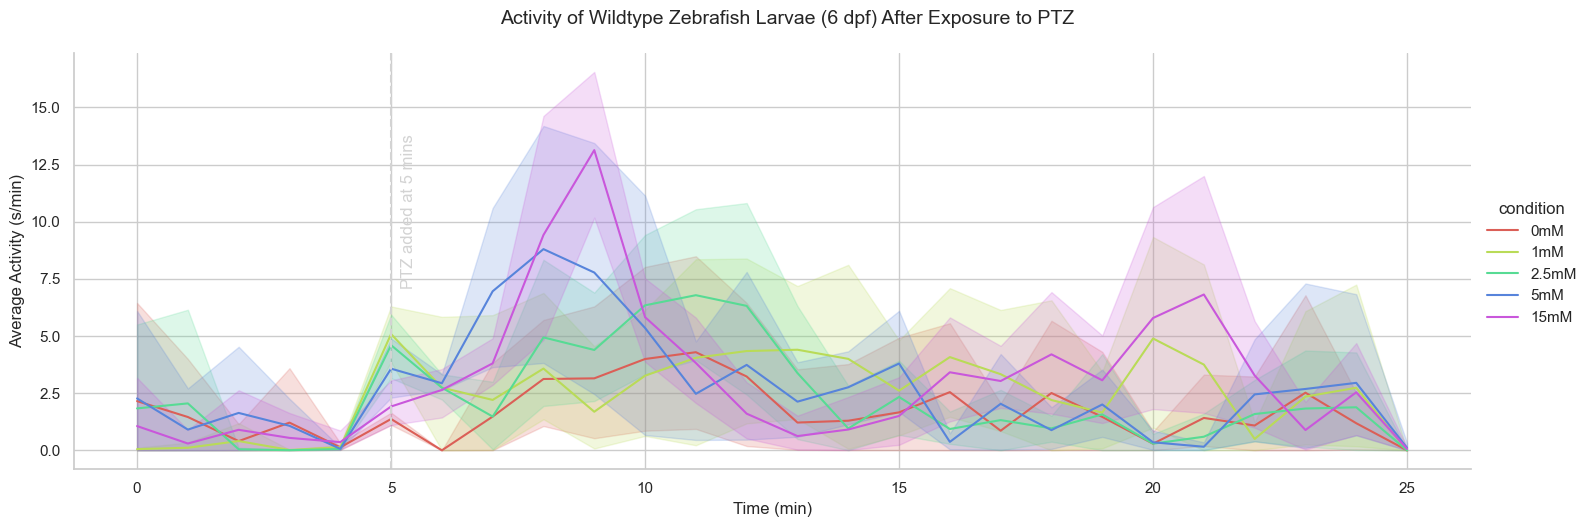

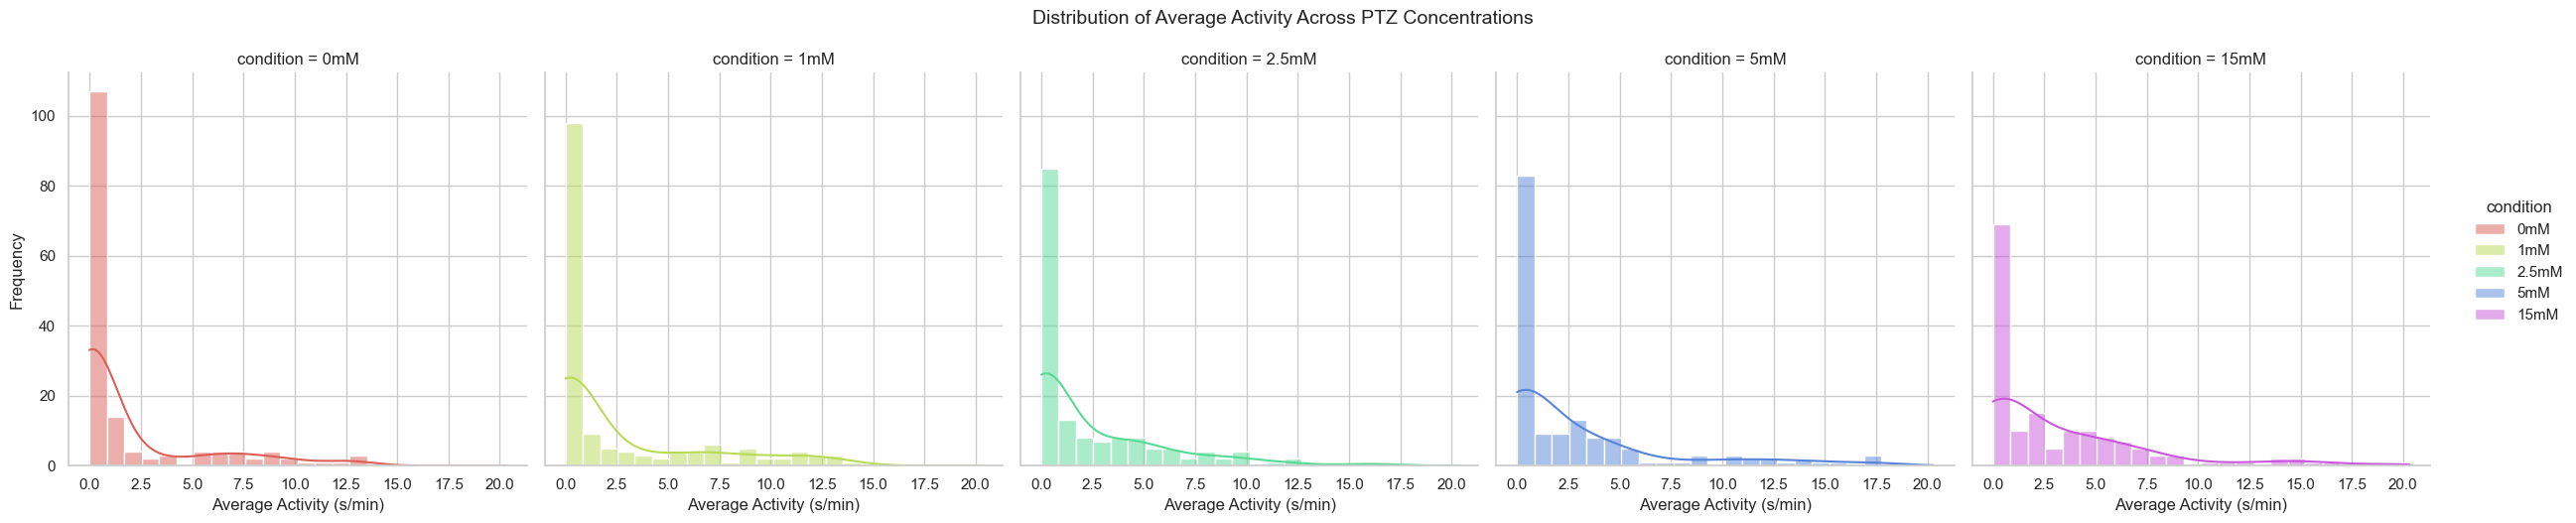

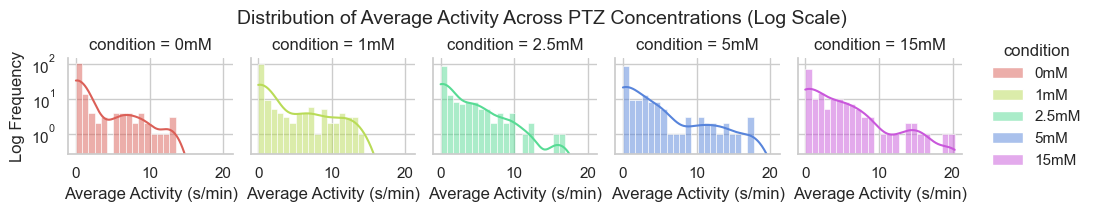

In [15]:
df = wt_ptz_obj.prepped_data
# sns.relplot(x="stdate_sttime", y="middur",data=df, kind="line", hue='condition', aspect=3)
# sns.displot(data=df, x="middur", col="condition", kde=True)

# Convert the stdate_sttime column to datetime if not already
df['stdate_sttime'] = pd.to_datetime(df['stdate_sttime'])

# Calculate elapsed time in seconds (or other units)
df['elapsed_time'] = (df['stdate_sttime'] - df['stdate_sttime'].min()).dt.total_seconds()

# Convert seconds to minutes/hours if needed (optional)
df['elapsed_time_minutes'] = df['elapsed_time'] / 60

# Set color-blind friendly palette
# sns.set_palette("colorblind")
# Set hls_palette for displot with alpha
hls_colors = sns.color_palette("hls", n_colors=df['condition'].nunique())
colors_with_alpha_dist = [(r, g, b, 0.1) for r, g, b in hls_colors]  # Add alpha to colors
colors = [(r, g, b, 1) for r, g, b in hls_colors]  # Add alpha to colors


# Line plot
line_plot = sns.relplot(
    x="elapsed_time_minutes", 
    y="middur", 
    data=df, 
    kind="line", 
    hue='condition', 
    aspect=3,
    palette=colors
)
line_plot.set_axis_labels("Time (min)", "Average Activity (s/min)")  # Rename axes

# Add vertical line and rotated label
for ax in line_plot.axes.flat:  # Access individual subplot axes in case of multiple conditions
    ax.axvline(x=5, color="lightgrey", linestyle="--", label="PTZ added at 5 mins")
    ax.text(5.2, ax.get_ylim()[1] * 0.6, "PTZ added at 5 mins", color="lightgrey", rotation=90, 
            verticalalignment='center', horizontalalignment='left')


line_plot.fig.suptitle("Activity of Wildtype Zebrafish Larvae (6 dpf) After Exposure to PTZ", 
                       y=1.05, fontsize=14)  # Add title with spacing above plot

# Distribution plot

dis_plot = sns.displot(
    data=df,
    x="middur",
    col="condition",
    kde=True,
    hue = "condition",
    palette=colors_with_alpha_dist  # Use custom palette with alpha
)

dis_plot.set_axis_labels("Average Activity (s/min)", "Frequency")  # Rename axes for distribution
dis_plot.fig.suptitle("Distribution of Average Activity Across PTZ Concentrations", y=1.05, fontsize=14)  # Add title

#LOGGED


# Update the displot to use a log scale for the frequency (y-axis)
dis_plot = sns.displot(
    data=df,
    x="middur",
    col="condition",
    kde=True,
    hue="condition",
    palette=colors_with_alpha_dist,  # Use custom palette with alpha
    height=2,  # Adjust the height of each subplot
    aspect=1  # Adjust the width-to-height ratio
)

# Apply log scale to the y-axis
for ax in dis_plot.axes.flat:  # Access each subplot
    ax.set_yscale("log")  # Set y-axis to log scale

# Set axis labels and title
dis_plot.set_axis_labels("Average Activity (s/min)", "Log Frequency")  # Update y-axis label
dis_plot.fig.suptitle("Distribution of Average Activity Across PTZ Concentrations (Log Scale)", 
                      y=1.05, fontsize=14)  # Update title

In [73]:
# Convert grouped_data (Series of lists) into a DataFrame
grouped_data_df = grouped_data.reset_index()
print(grouped_data_df)
# Convert lists of values into a string for easy copying
# grouped_data_df['values'] = grouped_data_df['values'].apply(lambda x: ', '.join(map(str, x)))

# # Save the DataFrame to a CSV file
# grouped_data_df.to_csv('wt_ptz_avg_activity.csv', index=False)

# print("Grouped data saved to 'wt_ptz_avg_activity.csv'")

# Convert grouped_data to a DataFrame, expanding the lists into separate columns
grouped_data_expanded = grouped_data.apply(pd.Series).reset_index()

# Save the DataFrame to a CSV file
# grouped_data_expanded.to_csv('grouped_data_expanded.csv', index=False)

# print("Grouped data saved to 'grouped_data_expanded.csv'")



# Group data by genotype, condition, and well, and calculate the sum of middur
grouped_data_sum = df.groupby(['genotype', 'condition', 'well'])['middur'].sum()

# Reset the index to turn the grouped data into a DataFrame
grouped_data_sum = grouped_data_sum.reset_index()

# Display the resulting DataFrame
print(grouped_data_sum)

# Optionally save to CSV
# grouped_data_sum.to_csv('grouped_data_sum.csv', index=False)
# print("Grouped data with sums saved to 'grouped_data_sum.csv'")




  genotype condition                                             middur
0       wt       0mM  [0.0, 0.04, 12.878, 0.0, 0.0, 0.0, 1.062, 0.04...
1       wt      15mM  [0.0, 6.325, 0.041, 0.0, 0.0, 0.0, 0.0, 1.784,...
2       wt       1mM  [0.0, 0.0, 0.178, 0.0, 0.0, 0.135, 0.0, 0.0, 0...
3       wt     2.5mM  [11.007, 0.0, 0.0, 0.0, 0.0, 0.0, 12.289, 0.0,...
4       wt       5mM  [2.142, 0.0, 0.0, 11.478, 0.0, 0.0, 0.04, 0.0,...
   genotype condition well   middur
0        wt       0mM   A1   80.115
1        wt       0mM   A2   30.712
2        wt       0mM   A3   29.680
3        wt       0mM   A4   61.877
4        wt       0mM   A5    2.760
5        wt       0mM   A6   59.053
6        wt      15mM   E1   83.440
7        wt      15mM   E2   71.538
8        wt      15mM   E3   60.384
9        wt      15mM   E4   89.266
10       wt      15mM   E5   92.840
11       wt      15mM   E6   91.193
12       wt       1mM   B1   60.143
13       wt       1mM   B2   78.419
14       wt       1mM   B3  

/Users/jadelau/Development/Neuroscience/B6 Epilepsies/b6_epilepsies.py:61: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  # box_name    = f"box{i+1}"  # Dynamically create the attribute name
/Users/jadelau/Development/Neuroscience/B6 Epilepsies/b6_epilepsies.py:444: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  


We have a condition!
No filtering applied: 'omit' is None.
Finished prepping data.
Drawing quick plots...
No wells to omit for box 16.


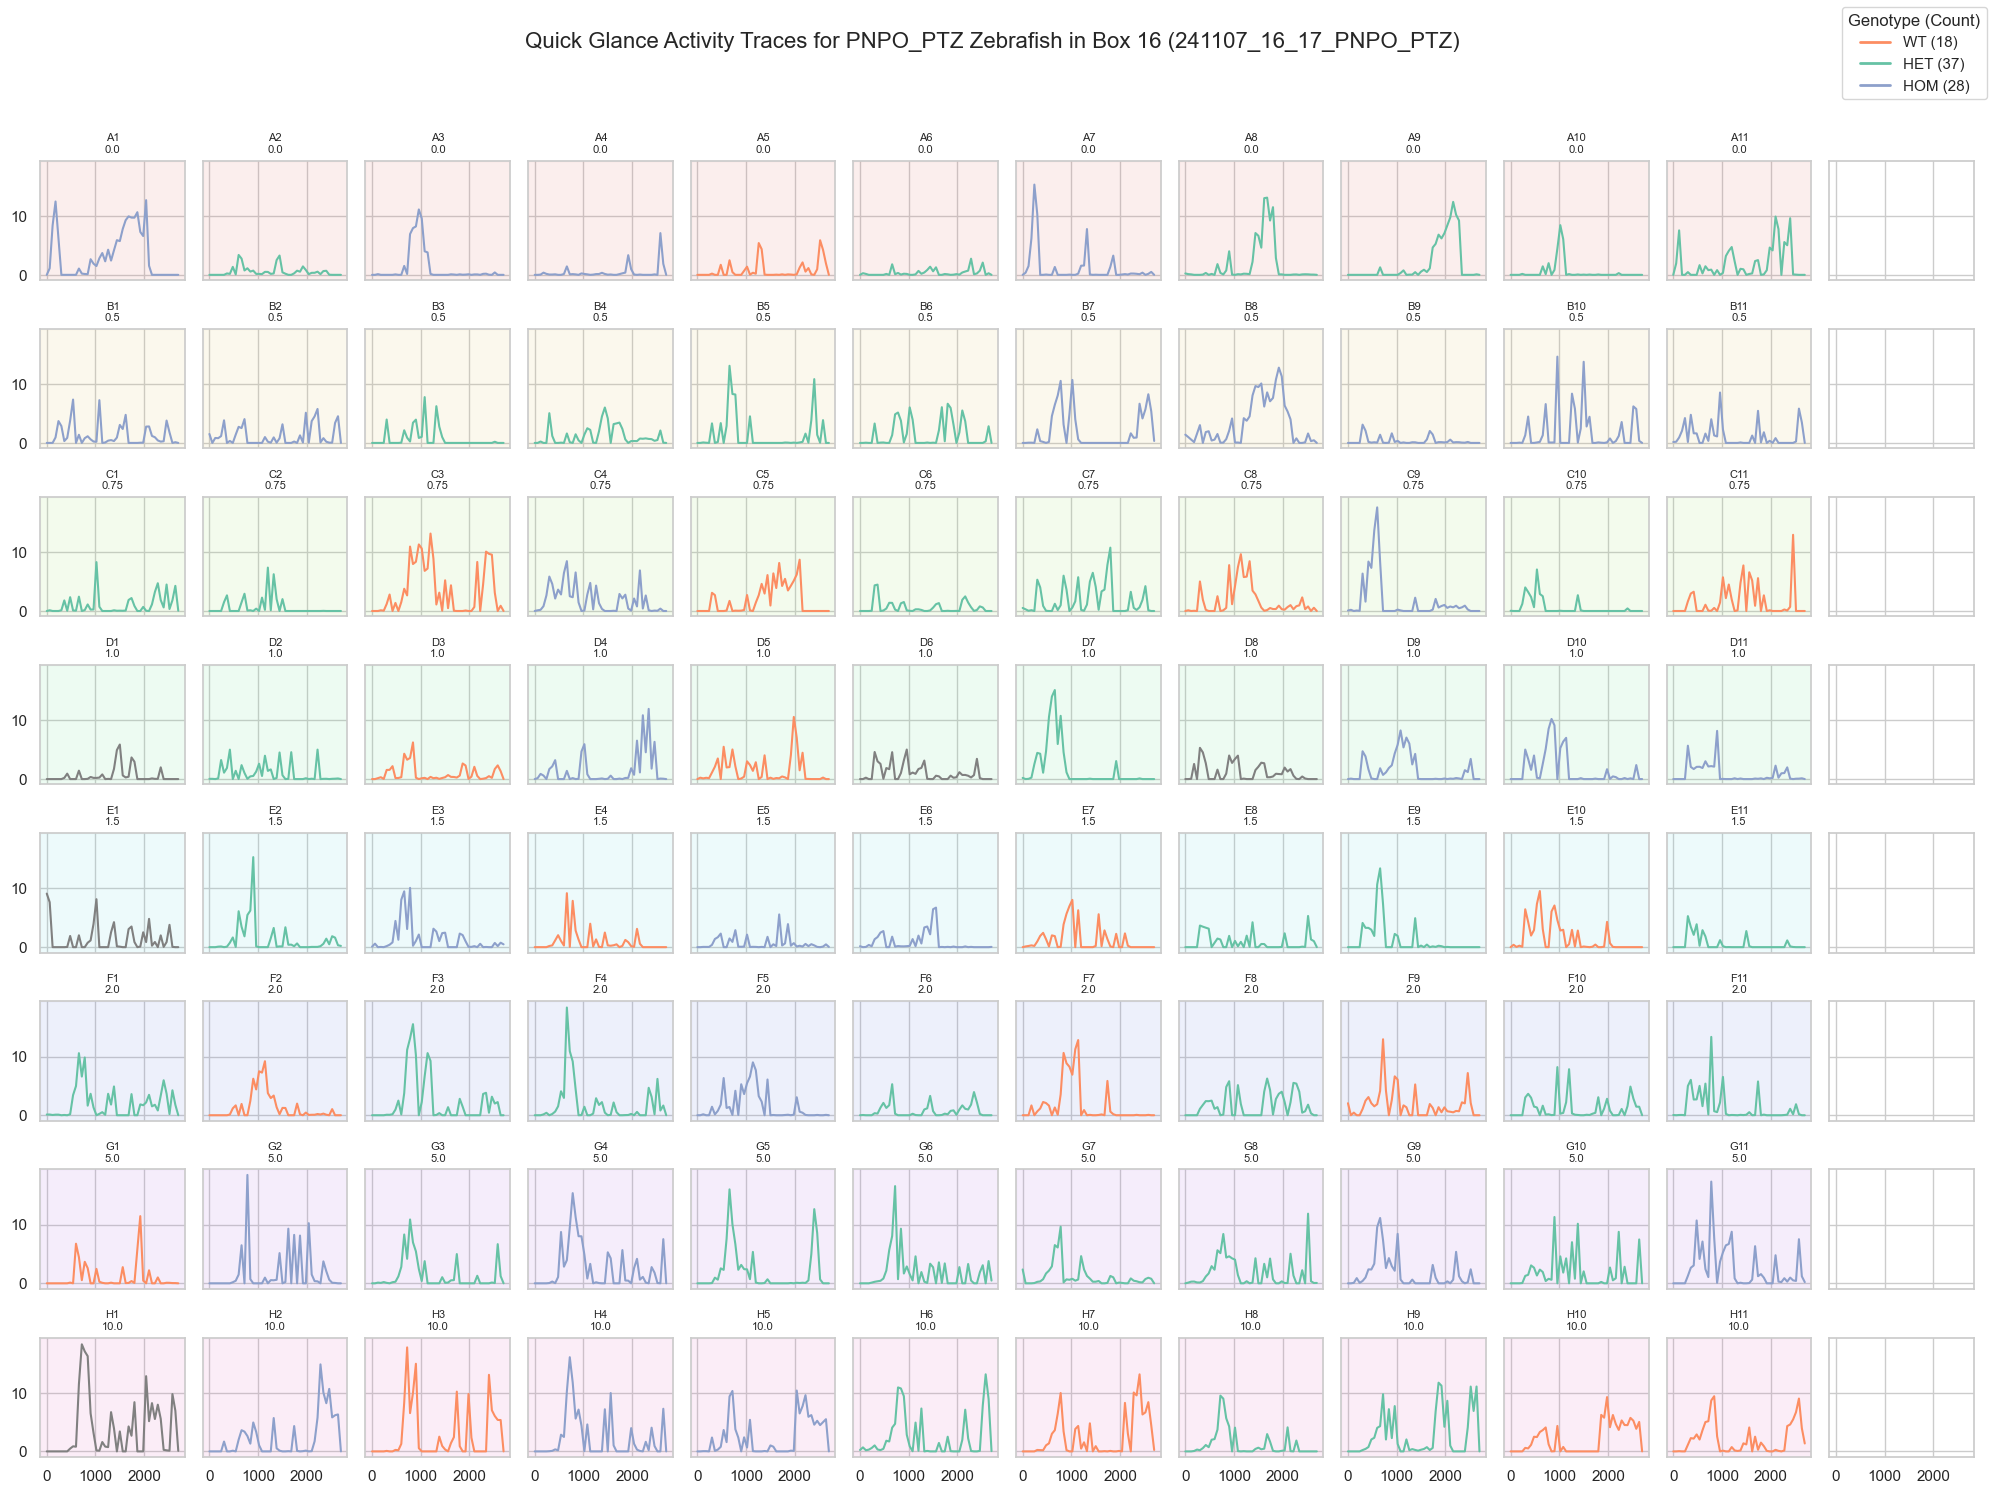

Quick plots, done.


,stdate_sttime,location,animal,start,end,middur,box,plate,well,genotype,condition
0,2024-07-11 16:25:58,C001,1-A01,0,60.000,0.00,16,1,A1,HOM,0.0
1,2024-07-11 16:25:58,C002,1-A02,0,60.000,0.00,16,1,A2,HET,0.0
2,2024-07-11 16:25:58,C003,1-A03,0,60.000,0.00,16,1,A3,HOM,0.0
3,2024-07-11 16:25:58,C004,1-A04,0,60.000,0.00,16,1,A4,HOM,0.0
4,2024-07-11 16:25:58,C005,1-A05,0,60.000,0.00,16,1,A5,WT,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4410,2024-07-11 17:10:58,C091,1-H07,2700,2702.446,0.24,16,1,H7,WT,10.0
4411,2024-07-11 17:10:58,C092,1-H08,2700,2702.446,0.00,16,1,H8,HET,10.0
4412,2024-07-11 17:10:58,C093,1-H09,2700,2702.446,0.00,16,1,H9,HET,10.0
4413,2024-07-11 17:10:58,C094,1-H10,2700,2702.446,0.00,16,1,H10,WT,10.0


In [10]:
#Middur output NOT FOR Sleep Analysis
# Define input variables
date   = "241107"
box1   = "16"
box2   = "17"
exp    = "PNPO_PTZ"
export = False
    
pnpo_ptz_obj = b6.MiddurData(date, box1, box2, exp, export) #.prepped_data attribute to access df
pnpo_ptz_obj.quick_plot_per_fish()

df = pnpo_ptz_obj.prepped_data
df
# sns.relplot(x="stdate_sttime", y="middur",data=pnpo_df, kind="line", hue='condition', aspect=3)

Start of experiment: 2024-11-07 16:25:58
We have a condition!
No filtering applied: 'omit' is None.
Finished prepping data.
Drawing quick plots...
           stdate_sttime location animal  start       end  middur box  plate  \
1152 2024-07-11 16:37:58     C001  1-A01    720   780.000   0.209  16      1   
1153 2024-07-11 16:37:58     C002  1-A02    720   780.000   0.748  16      1   
1154 2024-07-11 16:37:58     C003  1-A03    720   780.000   0.144  16      1   
1155 2024-07-11 16:37:58     C004  1-A04    720   780.000   0.088  16      1   
1156 2024-07-11 16:37:58     C005  1-A05    720   780.000   0.461  16      1   
...                  ...      ...    ...    ...       ...     ...  ..    ...   
4410 2024-07-11 17:10:58     C091  1-H07   2700  2702.446   0.240  16      1   
4411 2024-07-11 17:10:58     C092  1-H08   2700  2702.446   0.000  16      1   
4412 2024-07-11 17:10:58     C093  1-H09   2700  2702.446   0.000  16      1   
4413 2024-07-11 17:10:58     C094  1-H10   2700  2702

/Users/jadelau/Development/Neuroscience/B6 Epilepsies/b6_epilepsies.py:405: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  raw  = pd.read_csv(self.filename, usecols=cols, low_memory=False, header=0, parse_dates=[['stdate', 'sttime']])


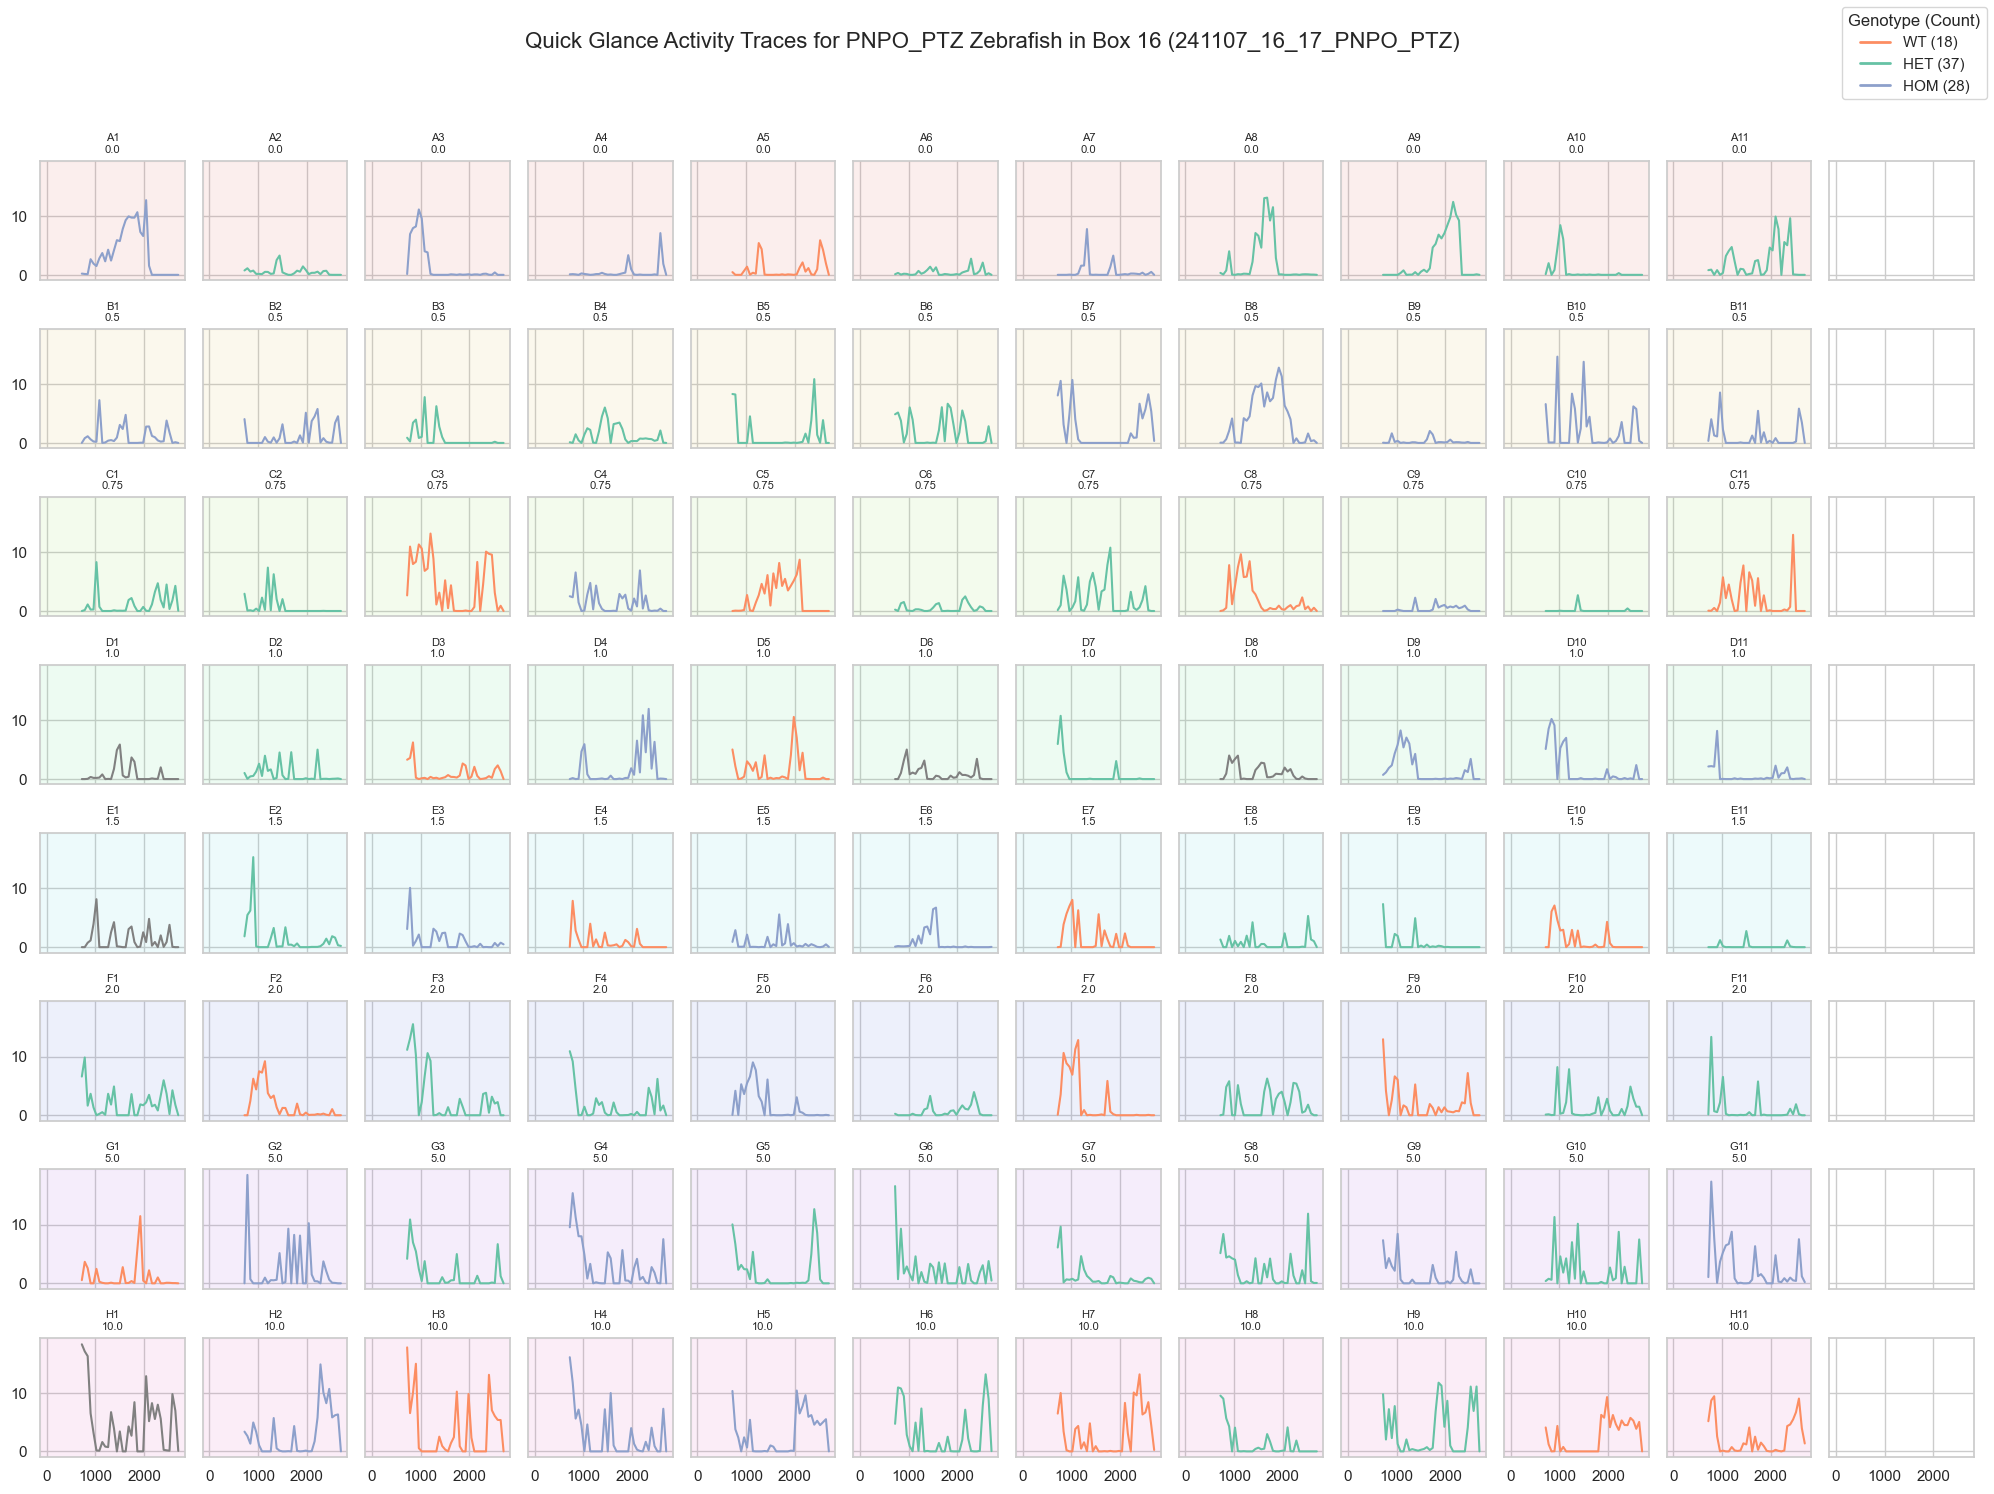

Quick plots, done.


,stdate_sttime,location,animal,start,end,middur,box,plate,well,genotype,condition,elapsed_time
0,2024-07-11 16:25:58,C001,1-A01,0,60.000,0.00,16,1,A1,HOM,0.0,0.0
1,2024-07-11 16:25:58,C002,1-A02,0,60.000,0.00,16,1,A2,HET,0.0,0.0
2,2024-07-11 16:25:58,C003,1-A03,0,60.000,0.00,16,1,A3,HOM,0.0,0.0
3,2024-07-11 16:25:58,C004,1-A04,0,60.000,0.00,16,1,A4,HOM,0.0,0.0
4,2024-07-11 16:25:58,C005,1-A05,0,60.000,0.00,16,1,A5,WT,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4410,2024-07-11 17:10:58,C091,1-H07,2700,2702.446,0.24,16,1,H7,WT,10.0,45.0
4411,2024-07-11 17:10:58,C092,1-H08,2700,2702.446,0.00,16,1,H8,HET,10.0,45.0
4412,2024-07-11 17:10:58,C093,1-H09,2700,2702.446,0.00,16,1,H9,HET,10.0,45.0
4413,2024-07-11 17:10:58,C094,1-H10,2700,2702.446,0.00,16,1,H10,WT,10.0,45.0


In [7]:
#Middur output NOT FOR Sleep Analysis
# Define input variables
date   = "241107"
box1   = "16"
box2   = "17"
exp    = "PNPO_PTZ"
export = False
    
pnpo_ptz_obj = b6.MiddurData(date, box1, box2, exp, export) #.prepped_data attribute to access df
pnpo_ptz_obj.quick_plot_per_fish()

df = pnpo_ptz_obj.prepped_data
df
# sns.relplot(x="stdate_sttime", y="middur",data=pnpo_df, kind="line", hue='condition', aspect=3)

Text(0.5, 1.05, 'Distribution of Average Activity Across PTZ Concentrations (Log Scale)')

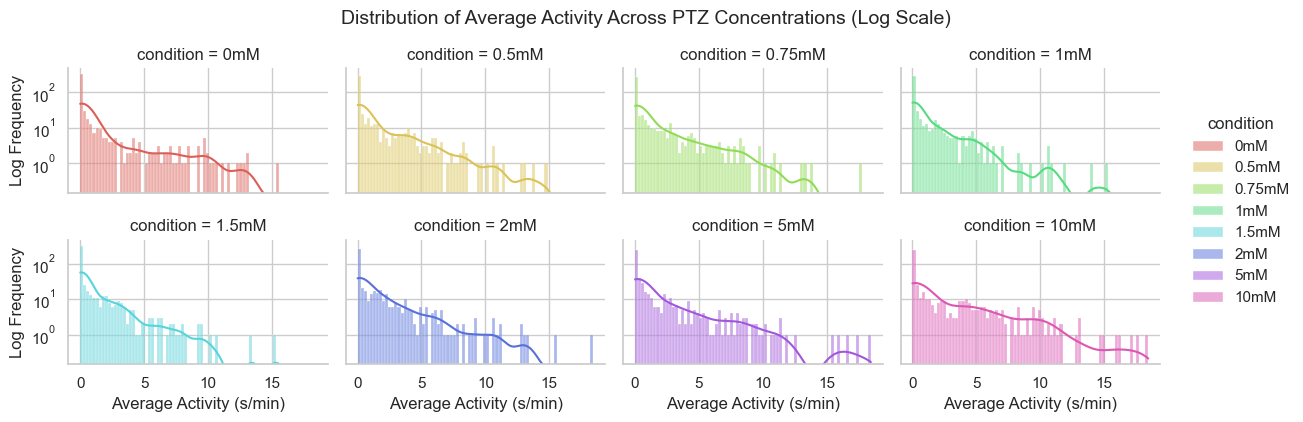

In [9]:

# Update the displot to use a log scale for the frequency (y-axis)
dis_plot = sns.displot(
    data=df,
    x="middur",
    col="condition",
    kde=True,
    hue="condition",
    palette=colors_with_alpha_dist,  # Use custom palette with alpha
    col_wrap=4,  # Wrap columns into 2 rows of 4
    height=2,  # Adjust the height of each subplot
    aspect=1.5  # Adjust the width-to-height ratio
)

# Apply log scale to the y-axis
for ax in dis_plot.axes.flat:  # Access each subplot
    ax.set_yscale("log")  # Set y-axis to log scale

# Set axis labels and title
dis_plot.set_axis_labels("Average Activity (s/min)", "Log Frequency")  # Update y-axis label
dis_plot.fig.suptitle("Distribution of Average Activity Across PTZ Concentrations (Log Scale)", 
                      y=1.05, fontsize=14)  # Update title

In [76]:
import pandas as pd
from scipy.stats import shapiro, kruskal, f_oneway

df = pnpo_ptz_obj.prepped_data
# wtptz_by_geno_cond = df.groupby(['genotype','condition','well'])['middur'].apply(list)

# Load your data into a DataFrame
# Assuming your data is already in the variable `df`

# Group data by genotype and condition, and collect data for each condition
grouped_data = df.groupby(['genotype', 'condition','well'])['middur'].agg('mean','count','sum')
# print(grouped_data)
# print(wtptz_by_geno_cond)

# Group data by genotype and condition, and collect data for each condition
# grouped_data = df.groupby(['genotype', 'condition'])['middur'].sum().apply(list)
# 

# Convert grouped_data (Series of lists) into a DataFrame
grouped_data_df = grouped_data.reset_index()
print(grouped_data_df)
# Convert lists of values into a string for easy copying
# grouped_data_df['values'] = grouped_data_df['values'].apply(lambda x: ', '.join(map(str, x)))

# # Save the DataFrame to a CSV file
# grouped_data_df.to_csv('wt_ptz_avg_activity.csv', index=False)

# print("Grouped data saved to 'wt_ptz_avg_activity.csv'")

# Convert grouped_data to a DataFrame, expanding the lists into separate columns
grouped_data_expanded = grouped_data.apply(pd.Series).reset_index()

print(grouped_data_expanded)
# Save the DataFrame to a CSV file
grouped_data_expanded.to_csv('grouped_data_expanded_pnpo_ptz.csv', index=False)

# print("Grouped data saved to 'grouped_data_expanded.csv'")



# Group data by genotype, condition, and well, and calculate the sum of middur
# grouped_data_sum = df.groupby(['genotype', 'condition', 'well'])['middur'].sum()

# Reset the index to turn the grouped data into a DataFrame
# grouped_data_sum = grouped_data_sum.reset_index()

# Display the resulting DataFrame
# print(grouped_data_sum)

# Optionally save to CSV
# grouped_data_sum.to_csv('grouped_data_sum.csv', index=False)
# print("Grouped data with sums saved to 'grouped_data_sum.csv'")




    genotype condition well    middur
0        HET     0.5mM   B3  0.752413
1        HET     0.5mM   B4  1.163935
2        HET     0.5mM   B5  1.439935
3        HET     0.5mM   B6  1.494326
4        HET    0.75mM   C1  1.009696
..       ...       ...  ...       ...
83  excluded     1.5mM   E1  1.422587
84  excluded      10mM   H1  3.696022
85  excluded       1mM   D1  0.589761
86  excluded       1mM   D6  1.030674
87  excluded       1mM   D8  1.105804

[88 rows x 4 columns]
    genotype condition well         0
0        HET     0.5mM   B3  0.752413
1        HET     0.5mM   B4  1.163935
2        HET     0.5mM   B5  1.439935
3        HET     0.5mM   B6  1.494326
4        HET    0.75mM   C1  1.009696
..       ...       ...  ...       ...
83  excluded     1.5mM   E1  1.422587
84  excluded      10mM   H1  3.696022
85  excluded       1mM   D1  0.589761
86  excluded       1mM   D6  1.030674
87  excluded       1mM   D8  1.105804

[88 rows x 4 columns]


Shapiro-Wilk test: Statistic=0.9464331865310669, p-value=0.0017210084479302168

Two-Way ANOVA Results:
                             sum_sq    df         F    PR(>F)
C(genotype)                0.926894   2.0  1.206526  0.306390
C(condition)              10.248347   7.0  3.811469  0.001737
C(genotype):C(condition)   5.001100  14.0  0.929981  0.532968
Residual                  23.047010  60.0       NaN       NaN


/var/folders/99/9p1rqw911_b36bj9w7ly35q80000gn/T/ipykernel_16496/3877235969.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['interaction'] = data['genotype'] + " | " + data['condition']  # Combine factors for post-hoc



Tukey HSD Post-Hoc Test Results:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
 HET | 0.5mM HET | 0.75mM  -0.2746    1.0 -1.8489 1.2996  False
 HET | 0.5mM    HET | 0mM  -0.0583    1.0 -1.5731 1.4565  False
 HET | 0.5mM  HET | 1.5mM  -0.2363    1.0 -1.8957 1.4231  False
 HET | 0.5mM   HET | 10mM   0.8949 0.9548 -0.8975 2.6873  False
 HET | 0.5mM    HET | 1mM   0.1723    1.0 -1.8601 2.2046  False
 HET | 0.5mM    HET | 2mM   0.3701    1.0 -1.1008  1.841  False
 HET | 0.5mM    HET | 5mM   0.4498    1.0  -1.065 1.9646  False
 HET | 0.5mM  HOM | 0.5mM   0.3815    1.0 -1.0894 1.8524  False
 HET | 0.5mM HOM | 0.75mM   0.5572    1.0 -1.4752 2.5895  False
 HET | 0.5mM    HOM | 0mM   0.3044    1.0  -1.355 1.9638  False
 HET | 0.5mM  HOM | 1.5mM  -0.2644    1.0 -2.0568  1.528  False
 HET | 0.5mM   HOM | 10mM   1.1351 0.7224 -0.6573 2.9275  False
 HET |

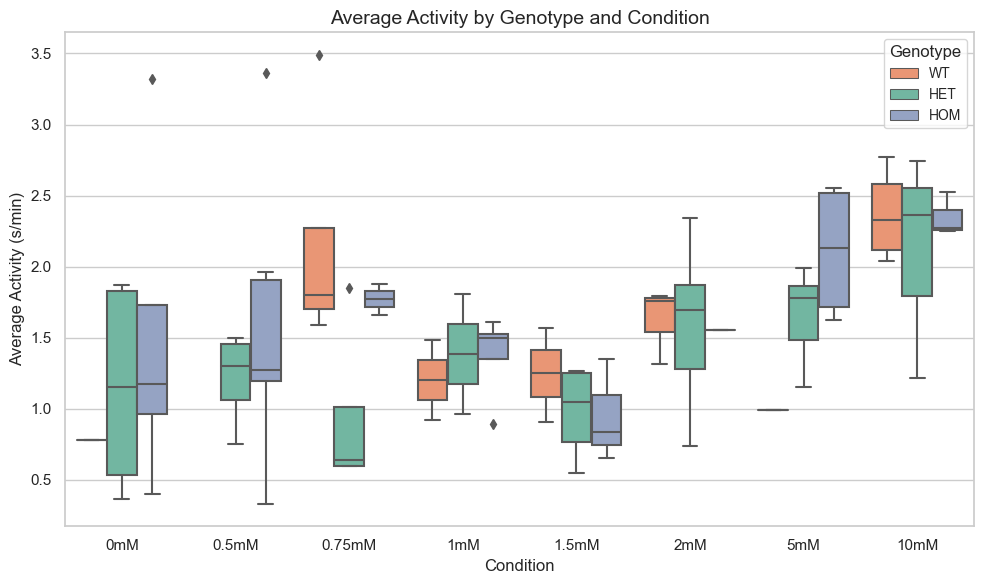

In [93]:
import pandas as pd
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro

grouped_data_expanded = grouped_data_expanded.rename(columns={0: 'middur'})
# Load your data (replace this with your actual DataFrame)
data =  grouped_data_expanded[grouped_data_expanded['genotype'] != 'excluded']


# Define the custom color palette and genotype order
new_colors_order = sns.color_palette(palette='Set2', n_colors=3)
new_colors_order[0], new_colors_order[1], new_colors_order[2] = new_colors_order[1], new_colors_order[0], new_colors_order[2]
color_map = dict(zip(['WT', 'HET', 'HOM'], new_colors_order))

# Optional: Reorder genotypes
genotype_order = ['WT', 'HET', 'HOM']

# Test for normality of residuals (optional)
model = ols('middur ~ C(genotype) * C(condition)', data=data).fit()
residuals = model.resid
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

# Two-Way ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nTwo-Way ANOVA Results:")
print(anova_table)

# Post-hoc testing with Tukey's HSD
data['interaction'] = data['genotype'] + " | " + data['condition']  # Combine factors for post-hoc
tukey = pairwise_tukeyhsd(endog=data['middur'], groups=data['interaction'], alpha=0.05)
print("\nTukey HSD Post-Hoc Test Results:")
print(tukey)

# Optional: Plot results
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# sns.boxplot(data=data, x='condition', y='middur', hue='genotype')
sns.boxplot(
    data=data, 
    x='condition', 
    y='middur', 
    hue='genotype', 
    palette=color_map,  # Apply the custom color palette
    hue_order=genotype_order,  # Ensure consistent order
    order = ['0mM', '0.5mM', '0.75mM', '1mM', '1.5mM','2mM','5mM','10mM']
)
plt.title('Average Activity by Genotype and Condition', fontsize=14)
plt.ylabel('Average Activity (s/min)', fontsize=12)
plt.xlabel('Condition', fontsize=12)
plt.legend(title='Genotype', fontsize=10)
plt.tight_layout()
plt.show()

In [90]:
df

,stdate_sttime,location,animal,start,end,middur,box,plate,well,genotype,condition
0,2024-07-11 16:25:58,C001,1-A01,0,60.000,0.00,16,1,A1,HOM,0mM
1,2024-07-11 16:25:58,C002,1-A02,0,60.000,0.00,16,1,A2,HET,0mM
2,2024-07-11 16:25:58,C003,1-A03,0,60.000,0.00,16,1,A3,HOM,0mM
3,2024-07-11 16:25:58,C004,1-A04,0,60.000,0.00,16,1,A4,HOM,0mM
4,2024-07-11 16:25:58,C005,1-A05,0,60.000,0.00,16,1,A5,WT,0mM
...,...,...,...,...,...,...,...,...,...,...,...
4410,2024-07-11 17:10:58,C091,1-H07,2700,2702.446,0.24,16,1,H7,WT,10mM
4411,2024-07-11 17:10:58,C092,1-H08,2700,2702.446,0.00,16,1,H8,HET,10mM
4412,2024-07-11 17:10:58,C093,1-H09,2700,2702.446,0.00,16,1,H9,HET,10mM
4413,2024-07-11 17:10:58,C094,1-H10,2700,2702.446,0.00,16,1,H10,WT,10mM
